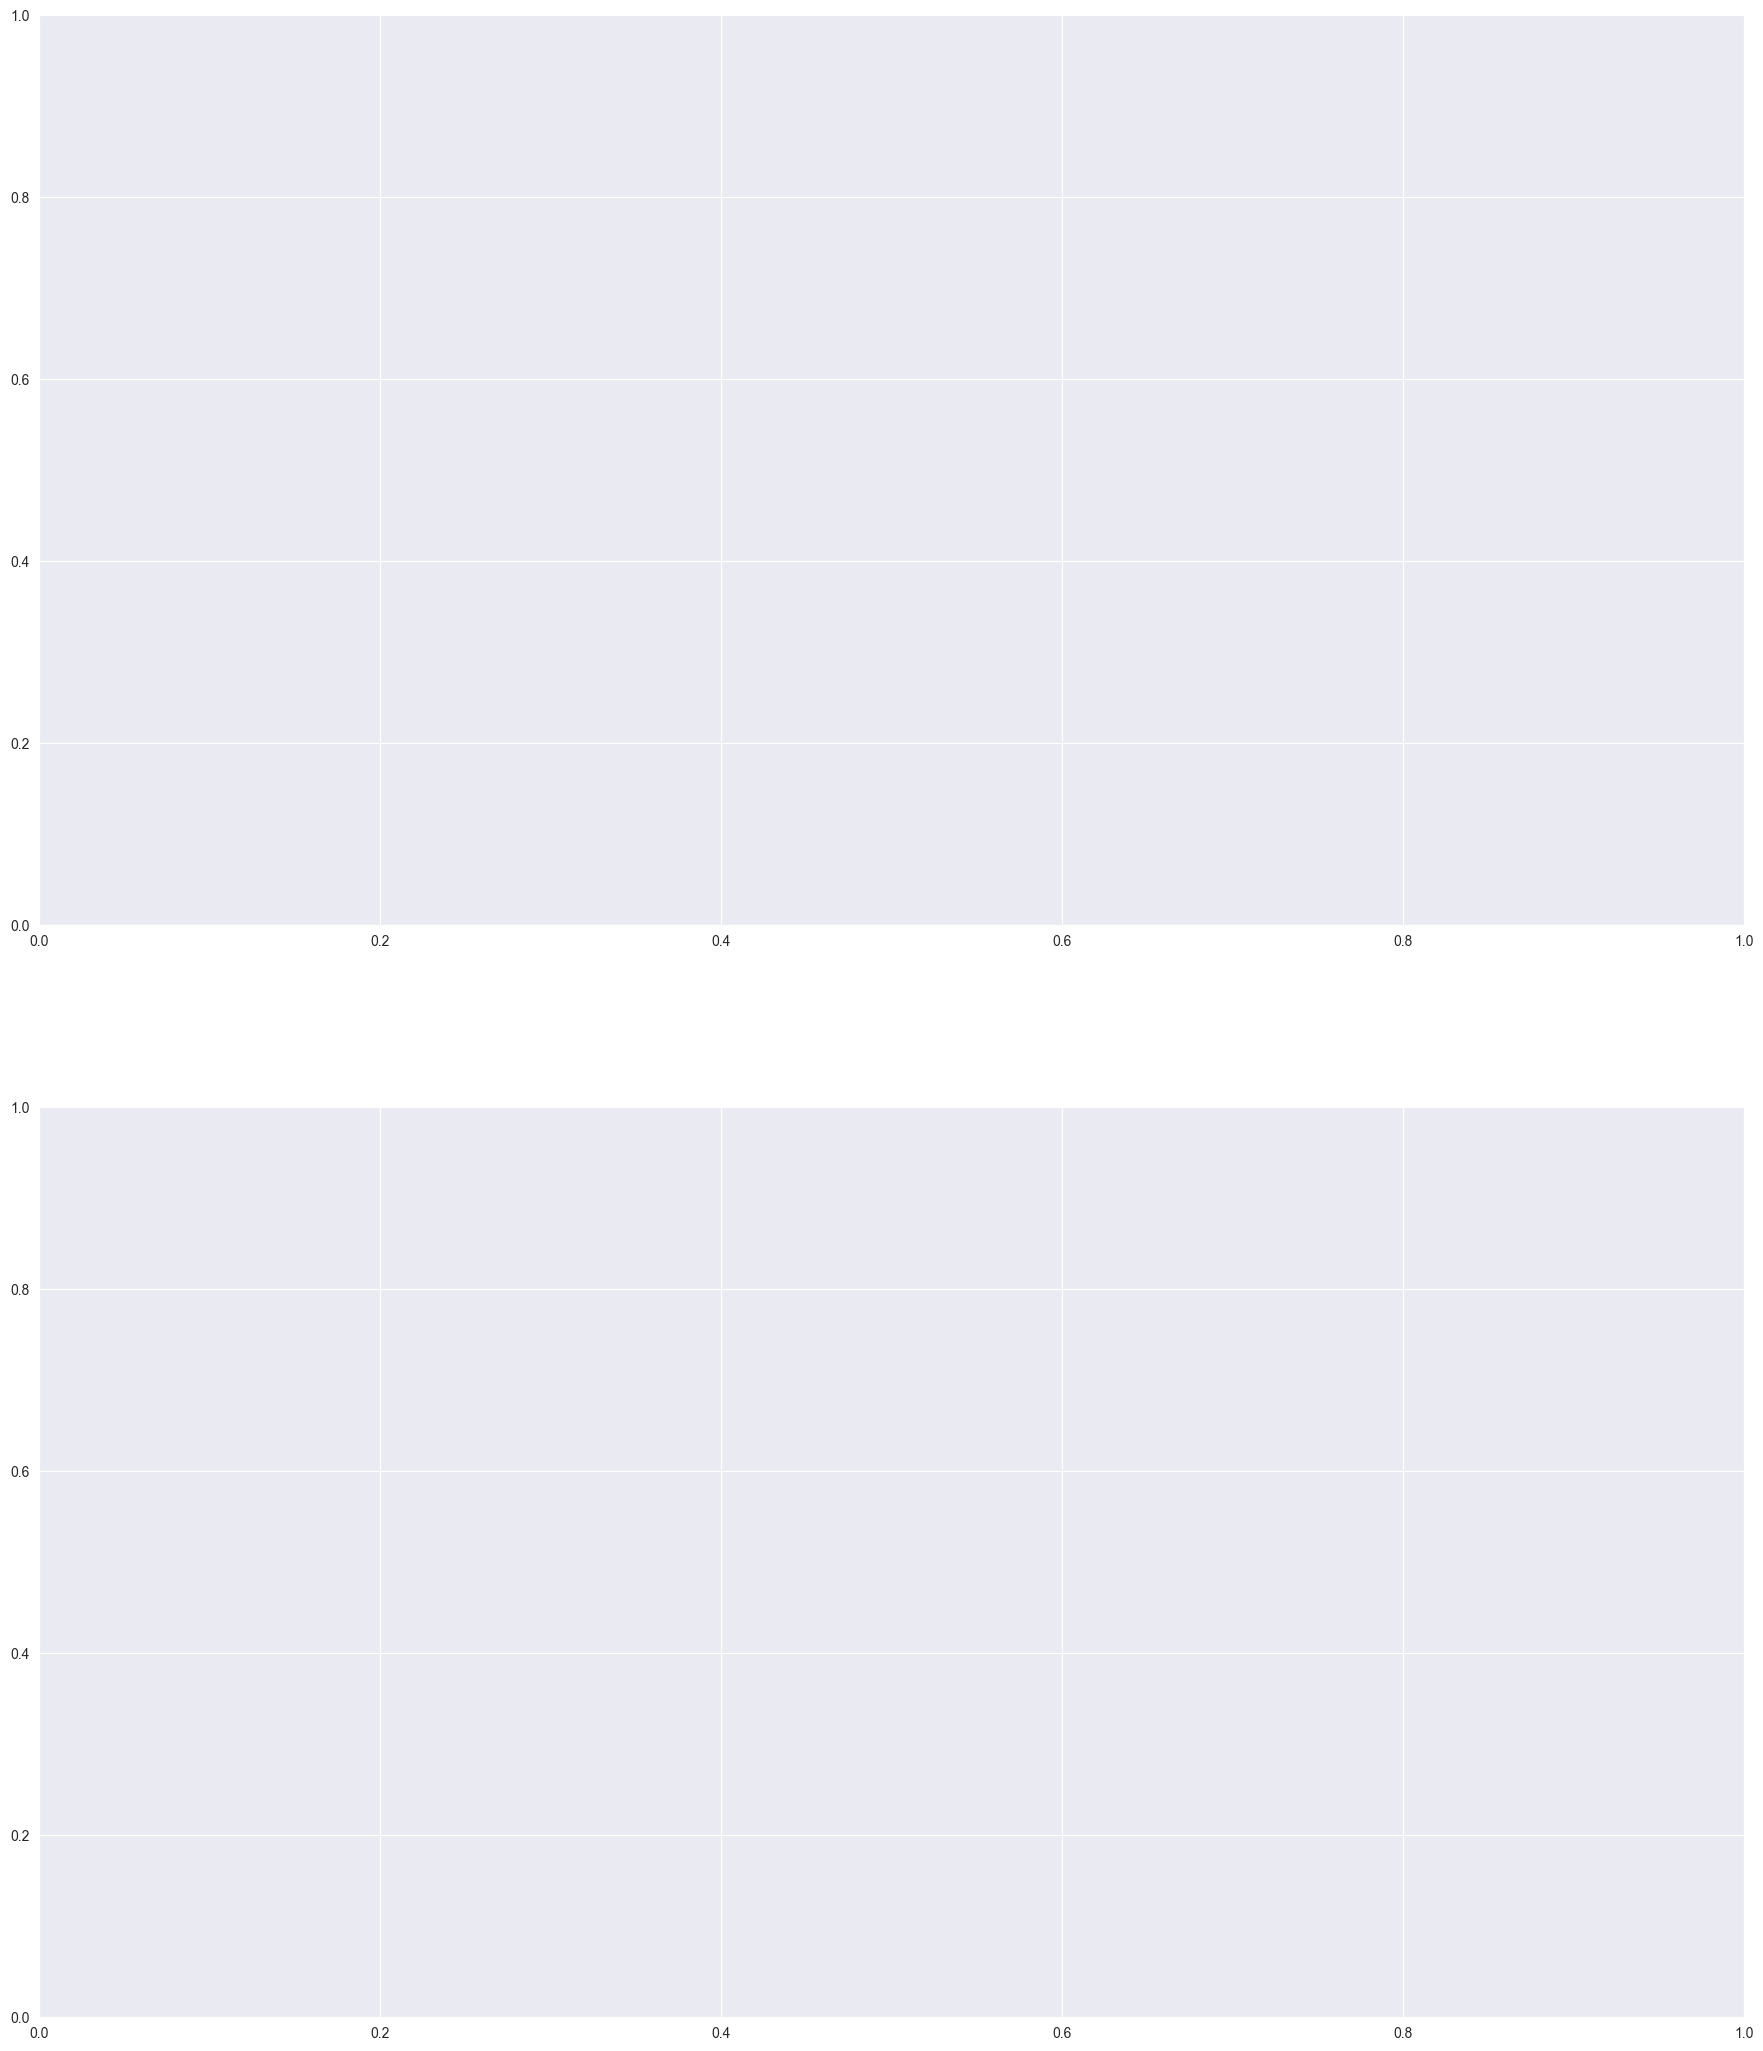

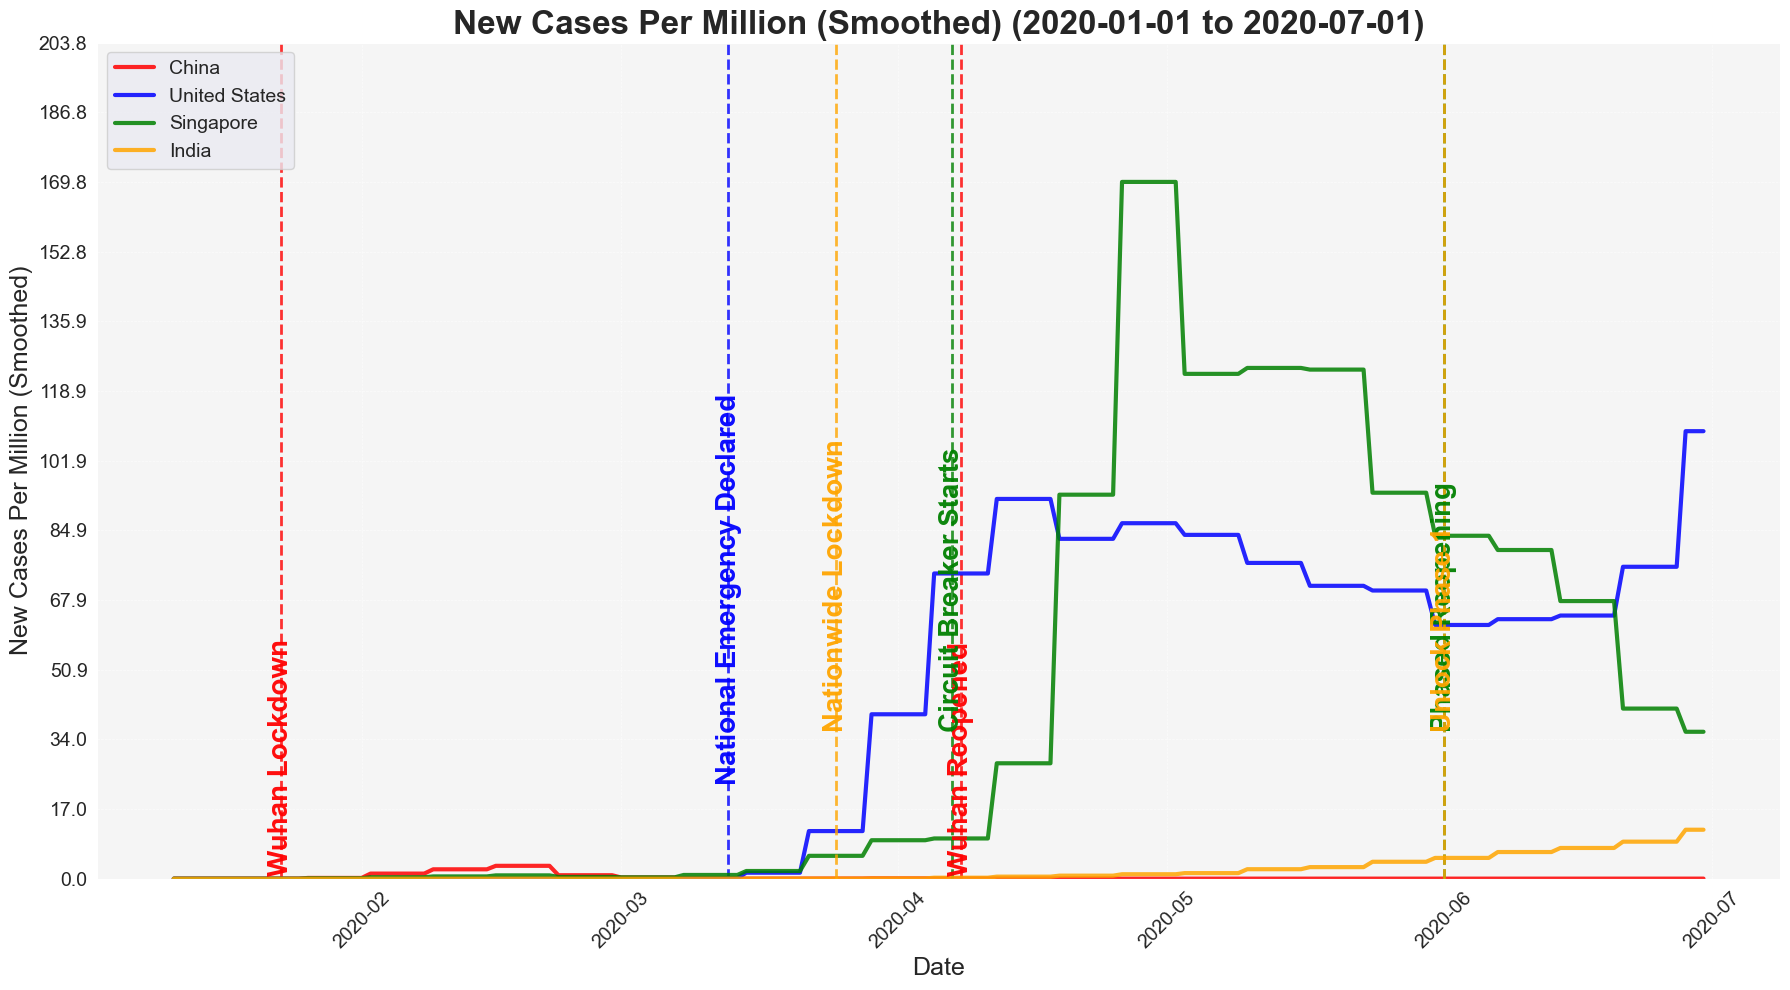

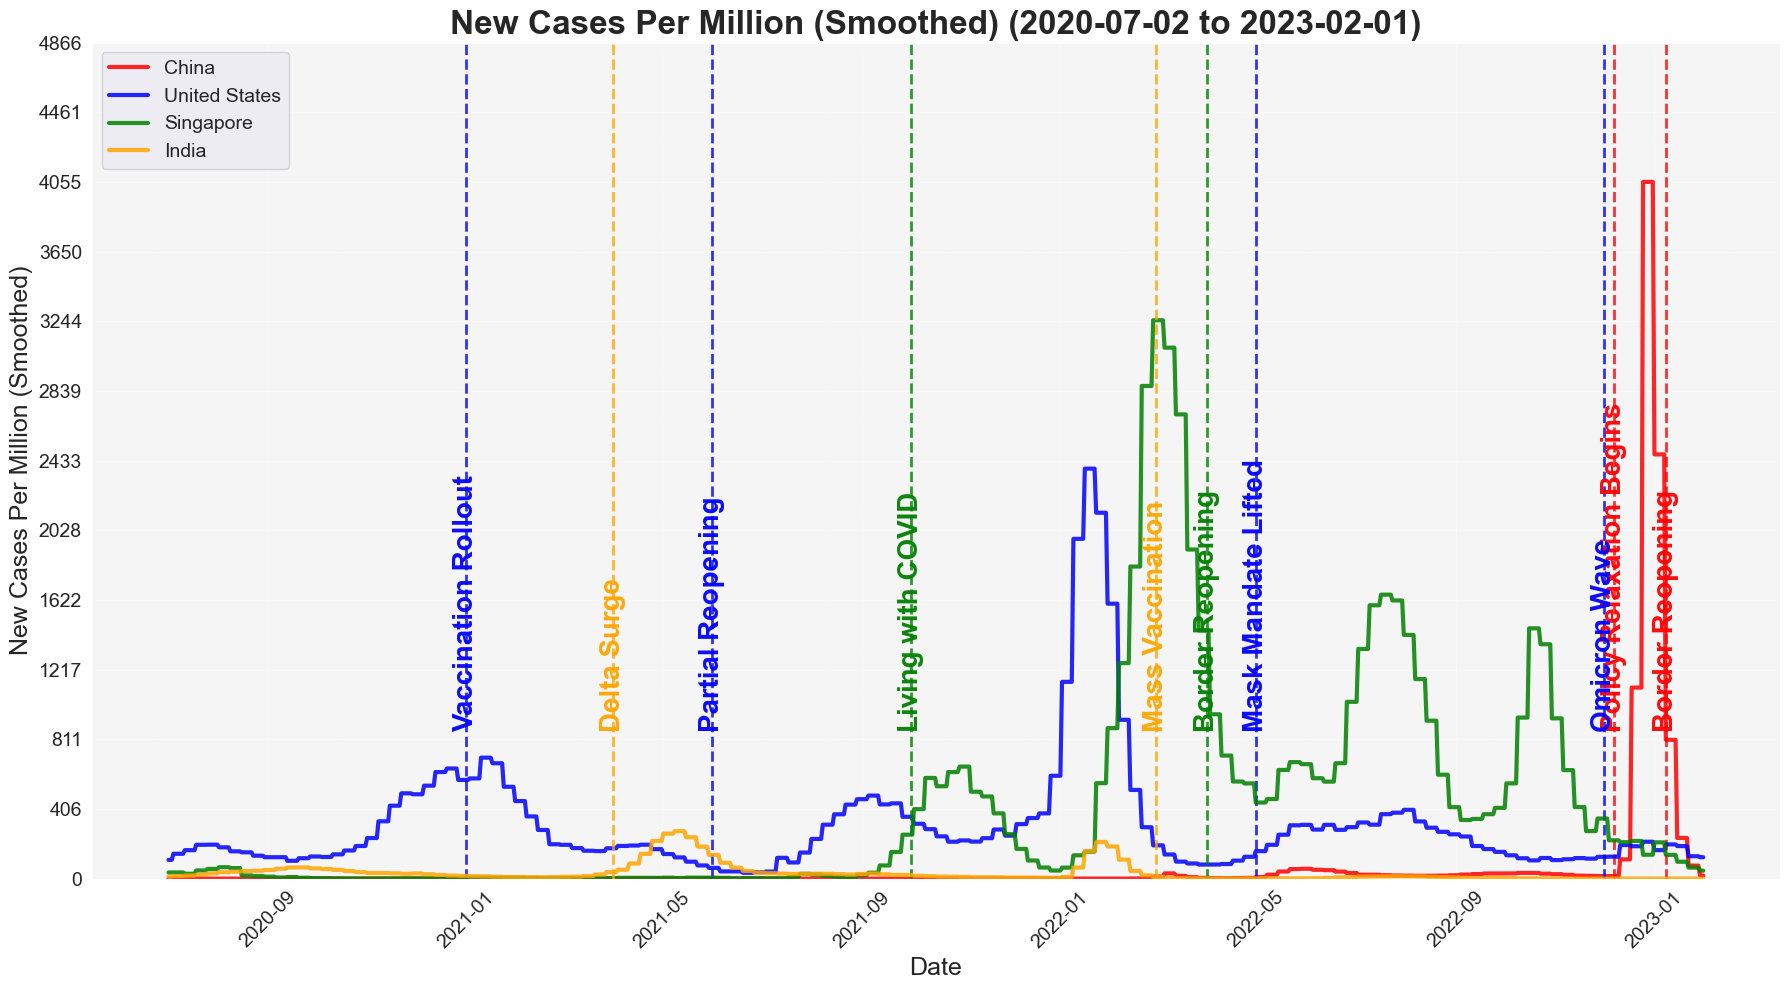

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load COVID-19 data
covid_data = pd.read_csv("owid-covid-data.csv")

# Filter for China, US, Singapore, India
countries = ["China", "United States", "Singapore", "India"]
df = covid_data[covid_data['location'].isin(countries)]

# Focus on relevant columns, including 'population'
df = df[["date", "location", "new_cases", "new_deaths", "stringency_index", "total_cases",
         "total_deaths", "people_vaccinated_per_hundred", "gdp_per_capita",
         "hospital_beds_per_thousand", "life_expectancy", "total_cases_per_million", "total_deaths_per_million",
         "population"]]

df['date'] = pd.to_datetime(df['date'])

# Standardize cases per million population
df["new_cases_per_million"] = df["new_cases"] / (df["population"] / 1_000_000)

# Apply smoothing
df['new_cases_per_million_smoothed'] = df.groupby('location')['new_cases_per_million'].transform(lambda x: x.rolling(7).mean())

# Truncate the dataset to include only data up to February 2023
df = df[df["date"] < "2023-02-01"]

# Define custom colors for countries
color_map = {
    "China": "red",
    "United States": "blue",
    "Singapore": "green",
    "India": "orange"
}
# 1. Line Plot for New Cases Per Million (Smoothed) Across Countries
# Define policy milestones for annotations
policy_milestones_detailed = {
    "China": [
        ("Wuhan Lockdown", "2020-01-23"),
        ("Wuhan Reopened", "2020-04-08"),
        ("Policy Relaxation Begins", "2022-12-07"),
        ("Border Reopening", "2023-01-08")
    ],
    "United States": [
        ("National Emergency Declared", "2020-03-13"),
        ("Vaccination Rollout", "2021-01-01"),
        ("Partial Reopening", "2021-06-01"),
        ("Mask Mandate Lifted", "2022-05-01"),
        ("Omicron Wave", "2022-12-01")
    ],
    "India": [
        ("Nationwide Lockdown", "2020-03-25"),
        ("Unlock Phase 1", "2020-06-01"),
        ("Delta Surge", "2021-04-01"),
        ("Mass Vaccination", "2022-03-01")
    ],
    "Singapore": [
        ("Circuit Breaker Starts", "2020-04-07"),
        ("Phased Reopening", "2020-06-01"),
        ("Living with COVID", "2021-10-01"),
        ("Border Reopening", "2022-04-01")
    ]
}

# Replot the data with enhancements for better aesthetics
fig, axes = plt.subplots(2, 1, figsize=(22, 26), sharey=True)

# Define time splits
time_ranges = [("2020-01-01", "2020-07-01"), ("2020-07-02", "2023-02-01")]

for start_date, end_date in time_ranges:
    # 创建单独的图
    fig, ax = plt.subplots(figsize=(18, 10))
    
    for country in countries:
        subset = df[(df["location"] == country) & (df["date"] >= start_date) & (df["date"] < end_date)]
        ax.plot(
            subset["date"],
            subset["new_cases_per_million_smoothed"],
            color=color_map[country],
            linewidth=3,
            alpha=0.85,
            label=country
        )

        # 添加政策标注
        if country in policy_milestones_detailed:
            for event, date in policy_milestones_detailed[country]:
                if pd.to_datetime(start_date) <= pd.to_datetime(date) < pd.to_datetime(end_date):
                    ax.axvline(pd.to_datetime(date), color=color_map[country], linestyle="--", alpha=0.8, linewidth=2)
                    ax.text(
                        pd.to_datetime(date),
                        ax.get_ylim()[1] * 0.2,  # 文字位置比例
                        event,
                        rotation=90,
                        verticalalignment='bottom',
                        horizontalalignment='center',
                        fontsize=20,  # 字体大小
                        color=color_map[country],
                        alpha=0.95,
                        clip_on=False,
                        weight="bold"
                    )

    # 动态调整纵轴范围
    subset_all = df[(df["date"] >= start_date) & (df["date"] < end_date)]
    max_value = subset_all["new_cases_per_million_smoothed"].max()
    ax.set_ylim(0, max_value * 1.2)  # 动态设置纵轴范围，避免曲线贴近 X 轴
    ax.yaxis.set_major_locator(plt.MultipleLocator(max_value / 10))  # 动态刻度间隔

    # 美化图表
    ax.set_facecolor("#f5f5f5")
    ax.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.set_title(f"New Cases Per Million (Smoothed) ({start_date} to {end_date})",
                 fontsize=24, weight='bold')
    ax.set_xlabel("Date", fontsize=18)
    ax.set_ylabel("New Cases Per Million (Smoothed)", fontsize=18)
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)

    # 添加图例
    ax.legend(loc="upper left", fontsize=14)

    plt.tight_layout()
    plt.show()




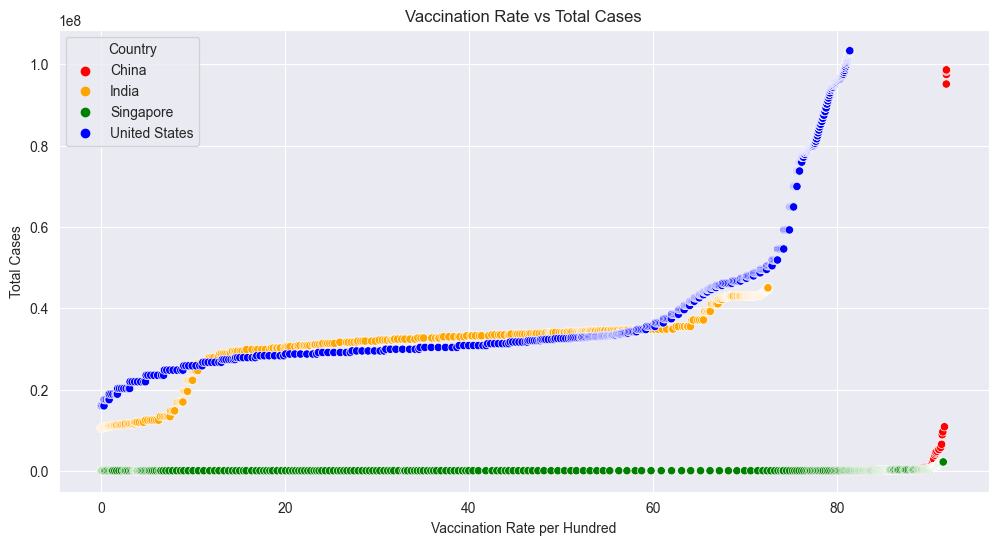

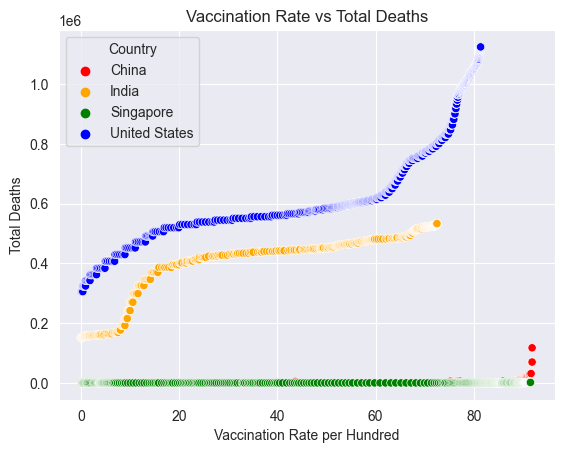

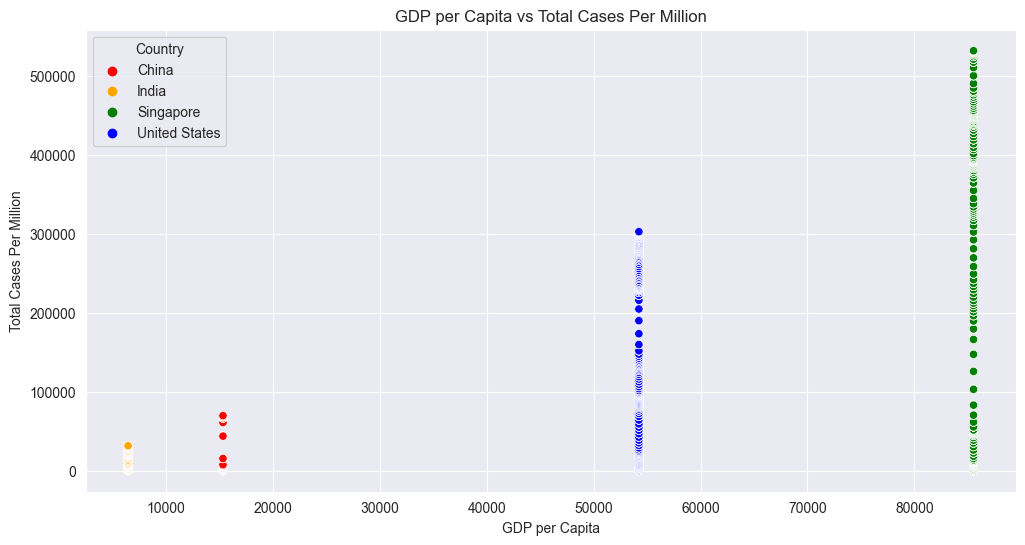

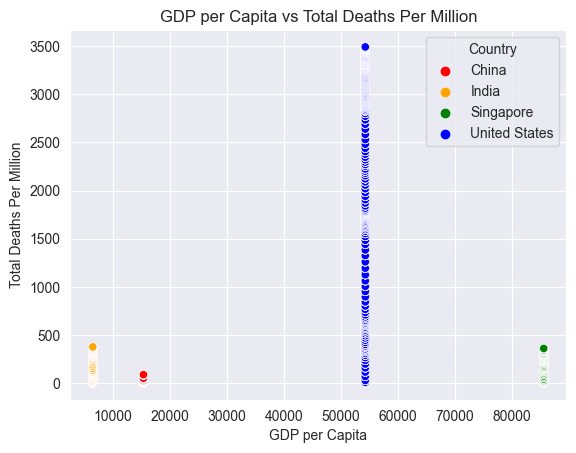

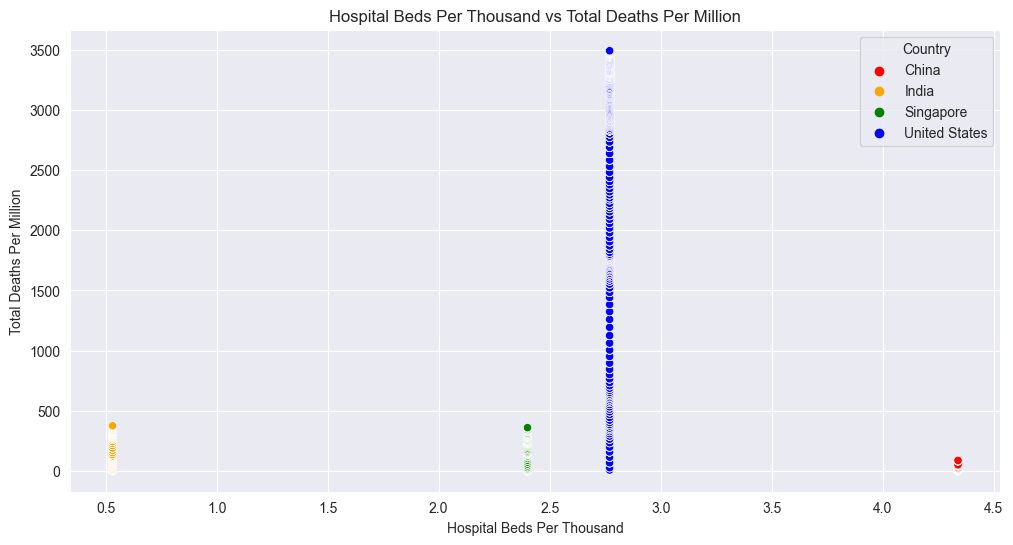

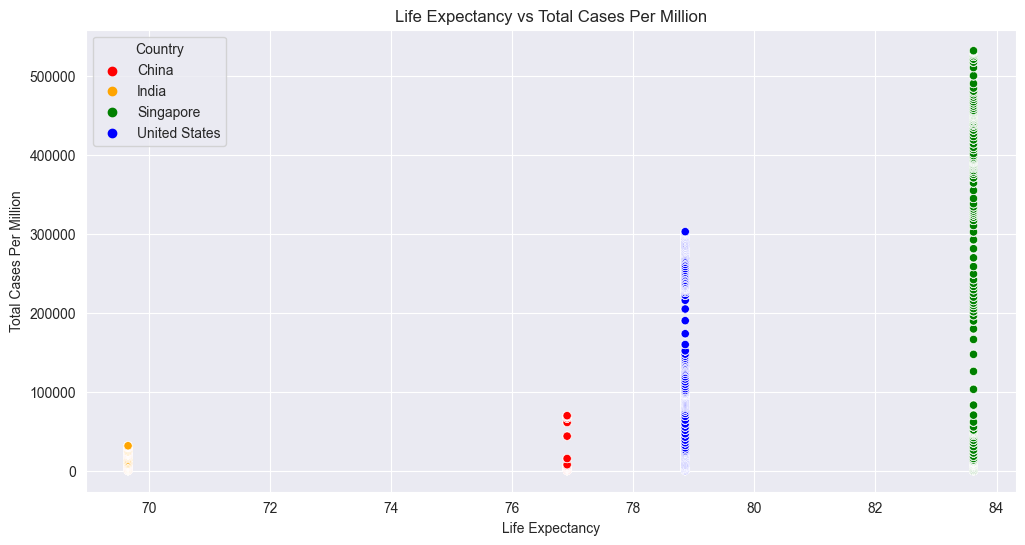

In [12]:
# Load COVID-19 data
covid_data = pd.read_csv("owid-covid-data.csv")

# Filter for China, US, Singapore, India
countries = ["China", "United States", "Singapore", "India"]
df = covid_data[covid_data['location'].isin(countries)]

# Focus on relevant columns
df = df[["date", "location", "new_cases", "new_deaths", "stringency_index", "total_cases", 
         "total_deaths", "people_vaccinated_per_hundred", "gdp_per_capita", 
         "hospital_beds_per_thousand", "life_expectancy", "total_cases_per_million", "total_deaths_per_million"]]

df['date'] = pd.to_datetime(df['date'])

# 2. Scatter Plot for Vaccination vs Total Cases/Deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="people_vaccinated_per_hundred", y="total_cases", hue="location", palette=color_map)
plt.title("Vaccination Rate vs Total Cases")
plt.xlabel("Vaccination Rate per Hundred")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.show()

sns.scatterplot(data=df, x="people_vaccinated_per_hundred", y="total_deaths", hue="location", palette=color_map)
plt.title("Vaccination Rate vs Total Deaths")
plt.xlabel("Vaccination Rate per Hundred")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.show()

# 3. Scatter Plot for GDP per Capita vs Cases/Deaths Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="gdp_per_capita", y="total_cases_per_million", hue="location", palette=color_map)
plt.title("GDP per Capita vs Total Cases Per Million")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Cases Per Million")
plt.legend(title="Country")
plt.show()

sns.scatterplot(data=df, x="gdp_per_capita", y="total_deaths_per_million", hue="location", palette=color_map)
plt.title("GDP per Capita vs Total Deaths Per Million")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Deaths Per Million")
plt.legend(title="Country")
plt.show()

# 4. Scatter Plot for Hospital Beds vs Deaths Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="hospital_beds_per_thousand", y="total_deaths_per_million", hue="location", palette=color_map)
plt.title("Hospital Beds Per Thousand vs Total Deaths Per Million")
plt.xlabel("Hospital Beds Per Thousand")
plt.ylabel("Total Deaths Per Million")
plt.legend(title="Country")
plt.show()

# 5. Scatter Plot for Life Expectancy vs Cases Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="life_expectancy", y="total_cases_per_million", hue="location", palette=color_map)
plt.title("Life Expectancy vs Total Cases Per Million")
plt.xlabel("Life Expectancy")
plt.ylabel("Total Cases Per Million")
plt.legend(title="Country")
plt.show()

### **Reports and Conclusions for Each Chart**

---

### **1. Policies and Cases Comparison (Multi-axis Line Chart)**

#### **Analysis**:
- The chart indicates a clear relationship between policy changes and daily new cases:
  - **Tightening policies** (e.g., vaccine rollouts, border closures) often lead to a reduction in new cases.
  - **Relaxation of policies** (e.g., mask mandates lifted, border reopenings) correlates with spikes in new cases, especially during the Delta and Omicron waves.
- Timing and implementation of policies vary across countries:
  - **China** maintained strict lockdowns and policies, keeping case numbers consistently low.
  - **United States** adopted a "living with COVID" approach early, leading to significant case fluctuations.
  - **Singapore** balanced high vaccination rates with a "living with COVID" strategy, resulting in smoother case trends.

#### **Conclusion**:
- Policy tightening and relaxation significantly impact new case trends.
- The timing and strictness of policy implementation play a critical role in controlling the pandemic's spread.

---

### **2. Cumulative Cases/Deaths vs. Vaccination Rates (Scatter Plot)**

#### **Analysis**:
- **Cumulative Cases vs. Vaccination Rates**:
  - **Singapore and China** show high vaccination rates and low cumulative cases, demonstrating the effectiveness of vaccination in controlling the spread.
  - **United States** shows a high number of cumulative cases despite high vaccination rates, likely influenced by policy choices.
- **Cumulative Deaths vs. Vaccination Rates**:
  - **Singapore** demonstrates the lowest deaths at high vaccination rates, highlighting the vaccine's success in reducing severe outcomes.
  - **United States** shows increasing deaths with vaccination, potentially due to variant impacts or delayed policy responses.

#### **Conclusion**:
- High vaccination rates significantly reduce both cases and deaths, particularly when combined with effective policies.
- Vaccination alone is insufficient to control the pandemic without complementary preventive measures.

---

### **3. Economic Development vs. Pandemic Severity (Scatter Plot)**

#### **Analysis**:
- **Cumulative Cases vs. GDP per Capita**:
  - High-GDP countries (e.g., Singapore and the US) show higher cumulative cases, likely due to better testing coverage and transparency.
- **Cumulative Deaths vs. GDP per Capita**:
  - Singapore and China demonstrate low death rates despite economic differences, indicating the importance of efficient health systems and policies.
  - The US shows high death rates despite its high GDP, reflecting potential challenges in resource allocation or policy openness.

#### **Conclusion**:
- High GDP correlates with better testing but does not guarantee lower death rates.
- Policies and health system efficiency are critical alongside economic resources.

---

### **4. Healthcare Resources vs. Death Rates (Scatter Plot)**

#### **Analysis**:
- **Hospital Beds per Thousand vs. Death Rates**:
  - **China** has the highest bed availability (~4 per thousand) and the lowest death rates.
  - **India** shows the lowest bed availability and relatively low deaths, potentially influenced by population demographics or underreporting.
  - **US** shows higher bed availability (~3 per thousand) but the highest death rates, indicating resource strain or policy inefficiencies.
  - **Singapore** balances moderate bed availability (~2.5 per thousand) with the lowest death rates, showing the efficiency of its healthcare system.

#### **Conclusion**:
- Adequate healthcare resources (e.g., hospital beds) are associated with lower death rates, but resource allocation and policy effectiveness are equally important.

---

### **5. Health Level vs. Pandemic Spread (Scatter Plot)**

#### **Analysis**:
- **Life Expectancy vs. Cumulative Cases**:
  - Countries with higher life expectancy (e.g., Singapore and the US)

show higher cumulative cases, likely due to comprehensive testing and healthcare systems that identify more infections.
  - Countries with lower life expectancy (e.g., India and China) report fewer cases, which may reflect limited testing or strict containment measures.
- There is no clear relationship between life expectancy and the ability to control the pandemic:
  - While long life expectancy is often linked to better healthcare systems, other factors, such as policy implementation and public health strategies, play more critical roles.

#### **Conclusion**:
- High life expectancy countries tend to have higher detected case rates, potentially reflecting better testing rather than worse control.
- The relationship between health levels and pandemic spread is complex and heavily influenced by external factors, such as testing capacity and policy enforcement.

---

### **Overall Conclusions**

1. **Policies are key**: The timing and strictness of policy measures have a direct impact on case and death trends. Countries with well-timed and stringent policies (e.g., China, Singapore) achieved better pandemic outcomes.
2. **Vaccination is critical**: High vaccination rates effectively reduce deaths and, to a lesser extent, cases, especially when paired with other preventive measures.
3. **GDP alone is insufficient**: Economic development does not guarantee lower death or case rates; the efficiency of healthcare systems and policies matters significantly.
4. **Healthcare resources matter**: Sufficient hospital bed capacity correlates with lower death rates, but resource allocation and system efficiency are vital.
5. **Health level impacts are unclear**: While higher life expectancy is associated with better healthcare, its effect on controlling the pandemic is less significant compared to policies and testing capacity.

